# CV , grid search
from [model selection](http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html)

In [43]:
from sklearn import datasets, svm
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
svc = svm.SVC(C=1, kernel='linear')
svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])

0.97999999999999998

To get a better measure of prediction accuracy (which we can use as a proxy for goodness of fit of the model), we can successively split the data in folds that we use for training and testing:

# Kfold

In [52]:
import numpy as np
X_folds = np.array_split(X_digits, 3)
y_folds = np.array_split(y_digits, 3)
scores = list()
for k in range(3):
    # We use 'list' to copy, in order to 'pop' later on
    X_train = list(X_folds)
    X_test  = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test  = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(svc.fit(X_train, y_train).score(X_test, y_test))

In [56]:
from sklearn.model_selection import KFold, cross_val_score
X = ["a", "a", "b", "c", "c", "c"]
k_fold = KFold(3)

for train_indices, test_indices in k_fold.split(X):
    print('Train: %s | test: %s' % (train_indices, test_indices))

Train: [2 3 4 5] | test: [0 1]
Train: [0 1 4 5] | test: [2 3]
Train: [0 1 2 3] | test: [4 5]


In [57]:
[svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test]) 
     for train, test in k_fold.split(X_digits)]

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]

In [62]:
cross_val_score(svc, X_digits, y_digits, cv=k_fold, n_jobs=1)

array([ 0.93489149,  0.95659432,  0.93989983])

(0, 1.1)

C:\Program Files\Anaconda3\envs\py36\lib\site-packages\matplotlib\mathtext.py:854: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
C:\Program Files\Anaconda3\envs\py36\lib\site-packages\matplotlib\mathtext.py:855: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


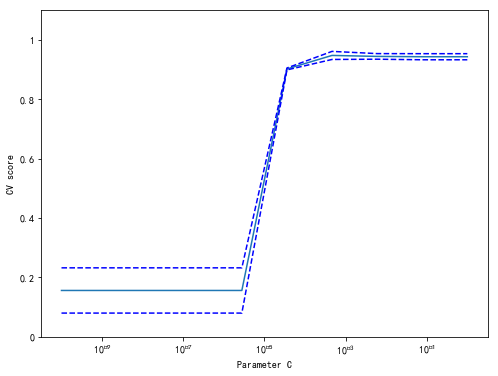

In [66]:
digits = datasets.load_digits()
X = digits.data
y = digits.target


svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X, y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

# Do the plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1, figsize=(8, 6))
# plt.clf()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
# plt.show()

In [77]:
param_grid = [{'C':np.logspace(-10, 0, 10)}]
clf = GridSearchCV(svc,param_grid=param_grid, cv=5, return_train_score=True)

In [78]:
clf.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': array([  1.00000e-10,   1.29155e-09,   1.66810e-08,   2.15443e-07,
         2.78256e-06,   3.59381e-05,   4.64159e-04,   5.99484e-03,
         7.74264e-02,   1.00000e+00])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [79]:
clf.cv_results_

{'mean_fit_time': array([ 0.29688849,  0.29560208,  0.29561324,  0.29688616,  0.30626183,
         0.15000548,  0.05625172,  0.04062676,  0.04687777,  0.04026418]),
 'mean_score_time': array([ 0.03682508,  0.04687858,  0.03750186,  0.03373938,  0.03437548,
         0.03750172,  0.01562672,  0.01250143,  0.0093751 ,  0.01250043]),
 'mean_test_score': array([ 0.13522538,  0.13522538,  0.13522538,  0.13522538,  0.13856427,
         0.90651085,  0.94880356,  0.94936004,  0.94936004,  0.94936004]),
 'mean_train_score': array([ 0.13994474,  0.13994474,  0.13994474,  0.13994474,  0.15485764,
         0.94393544,  0.98817507,  0.99833052,  1.        ,  1.        ]),
 'param_C': masked_array(data = [1e-10 1.2915496650148826e-09 1.6681005372000592e-08 2.1544346900318867e-07
  2.782559402207126e-06 3.5938136638046256e-05 0.00046415888336127822
  0.0059948425031894209 0.077426368268112777 1.0],
              mask = [False False False False False False False False False False],
        fill_value =

In [72]:
clf.best_score_

0.9493600445186422

# Grid Search

In [86]:
Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs),n_jobs=-1,verbose=True)

In [87]:
clf.fit(X_digits[:1000], y_digits[:1000])
clf.best_score_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    7.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.6s finished


0.92500000000000004

In [83]:
clf.best_estimator_

SVC(C=0.0077426368268112772, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [84]:
clf.score(X_digits[1000:], y_digits[1000:]) 

0.94353826850690092

# Cross-validation on diabetes Dataset Exercise¶
from [sklearn-doc](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#sphx-glr-auto-examples-exercises-plot-cv-diabetes-py)

Automatically created module for IPython interactive environment
Answer to the bonus question: how much can you trust the selection of alpha?

Alpha parameters maximising the generalization score on different
subsets of the data:
[fold 0] alpha: 0.10405, score: 0.53573
[fold 1] alpha: 0.05968, score: 0.16278
[fold 2] alpha: 0.10405, score: 0.44437

Answer: Not very much since we obtained different alphas for different
subsets of the data and moreover, the scores for these alphas differ
quite substantially.


C:\Program Files\Anaconda3\envs\py36\lib\site-packages\matplotlib\mathtext.py:854: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
C:\Program Files\Anaconda3\envs\py36\lib\site-packages\matplotlib\mathtext.py:855: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


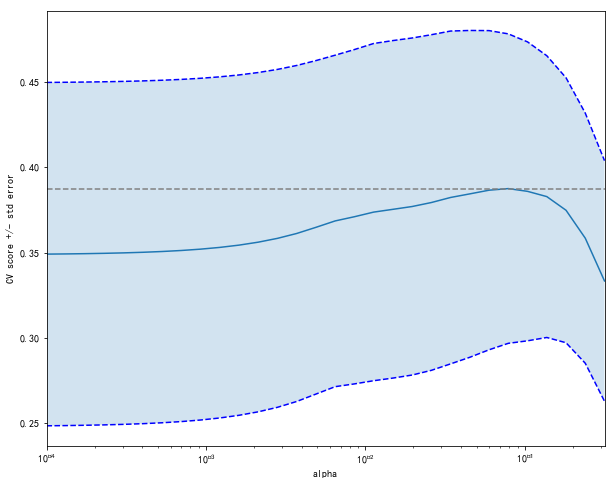

In [1]:
from __future__ import print_function
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]

lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 3

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(10, 8)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

# #############################################################################
# Bonus: how much can you trust the selection of alpha?

# To answer this question we use the LassoCV object that sets its alpha
# parameter automatically from the data by internal cross-validation (i.e. it
# performs cross-validation on the training data it receives).
# We use external cross-validation to see how much the automatically obtained
# alphas differ across different cross-validation folds.
lasso_cv = LassoCV(alphas=alphas, random_state=0)
k_fold = KFold(3)

print("Answer to the bonus question:",
      "how much can you trust the selection of alpha?")
print()
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold.split(X, y)):
    lasso_cv.fit(X[train], y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])))
print()
print("Answer: Not very much since we obtained different alphas for different")
print("subsets of the data and moreover, the scores for these alphas differ")
print("quite substantially.")


In [36]:
X = diabetes.data[:150]
y = diabetes.target[:150]

lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 3


In [38]:
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds,refit=False,return_train_score='True')

In [39]:
clf.fit(X,y)

GridSearchCV(cv=3, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': array([  1.00000e-04,   1.32035e-04,   1.74333e-04,   2.30181e-04,
         3.03920e-04,   4.01281e-04,   5.29832e-04,   6.99564e-04,
         9.23671e-04,   1.21957e-03,   1.61026e-03,   2.12611e-03,
         2.80722e-03,   3.70651e-03,   4.89390e-03,   6.46167e-03,
         8...   7.88046e-02,   1.04050e-01,   1.37382e-01,   1.81393e-01,
         2.39503e-01,   3.16228e-01])}],
       pre_dispatch='2*n_jobs', refit=False, return_train_score='True',
       scoring=None, verbose=0)

In [40]:
scores_std = clf.cv_results_['std_test_score']
scores = clf.cv_results_['mean_test_score']

In [41]:
scores

array([ 0.34908311,  0.34919799,  0.34934947,  0.34954908,  0.34981211,
        0.35015826,  0.35061336,  0.35121121,  0.35199462,  0.35301935,
        0.35435493,  0.35608875,  0.35832605,  0.36119022,  0.36479555,
        0.36855937,  0.37102098,  0.37373637,  0.37536354,  0.37701536,
        0.37935476,  0.38233056,  0.38443899,  0.3865947 ,  0.38753399,
        0.38591916,  0.38284243,  0.37482125,  0.35843308,  0.33333268])